In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

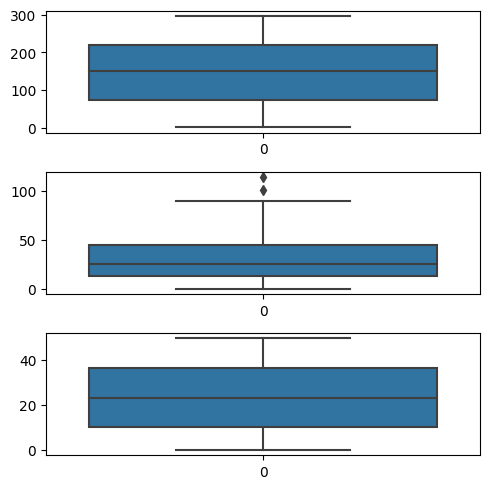

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

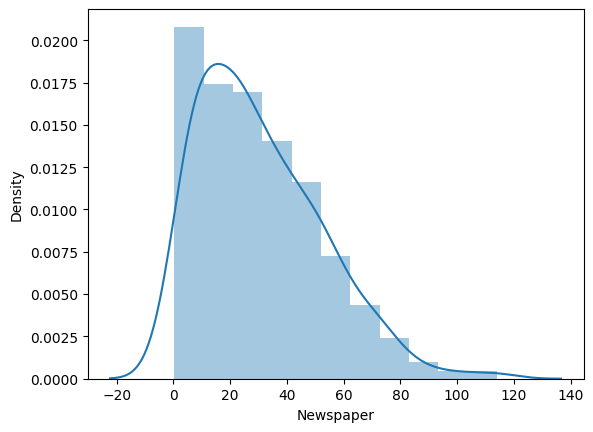

In [11]:
sns.distplot(df['Newspaper'])

In [13]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [14]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)


-35.775000000000006
93.625


In [15]:
data = df.copy()

In [16]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

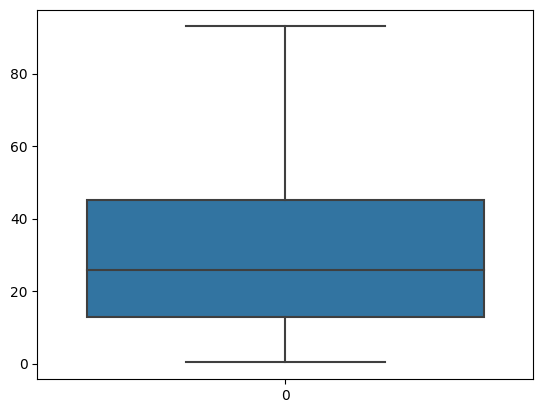

In [17]:
sns.boxplot(data['Newspaper'])

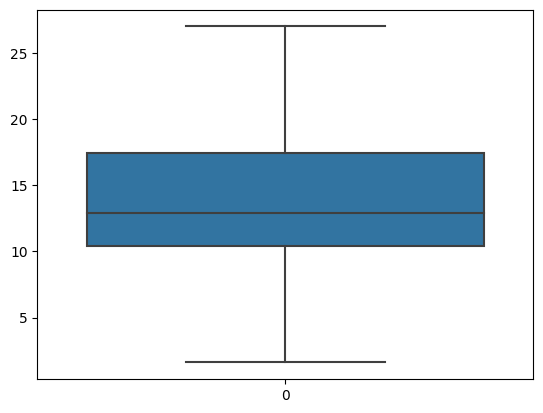

In [18]:
sns.boxplot(data['Sales']);

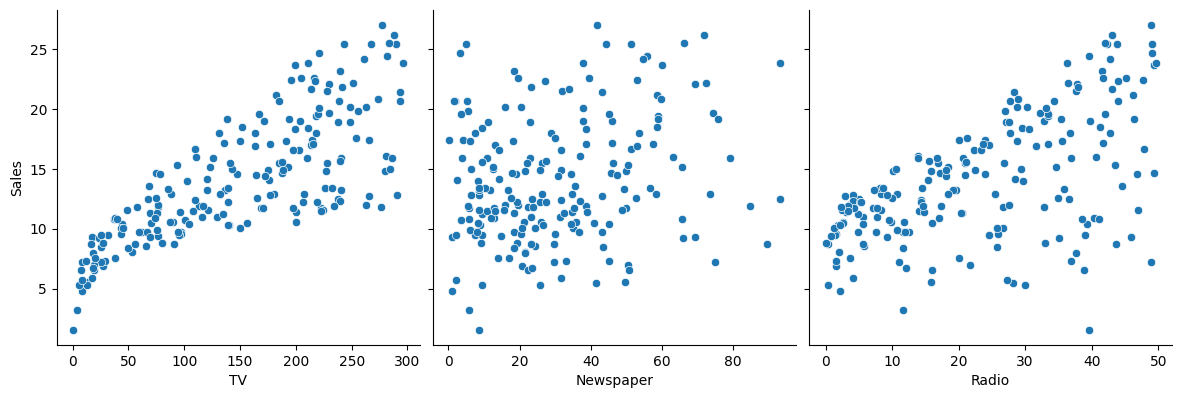

In [19]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

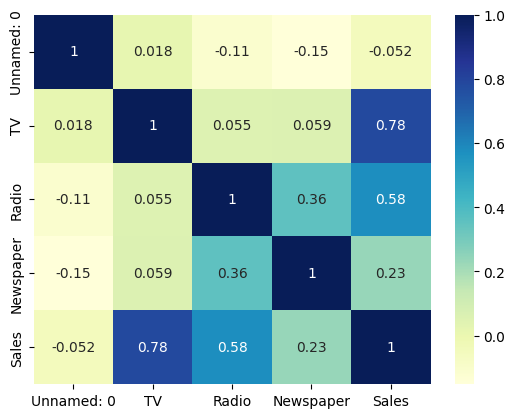

In [20]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [22]:
print(important_features)

['TV', 'Radio', 'Sales']


In [23]:
X = data['TV']
y = data['Sales']

In [24]:
X = X.values.reshape(-1,1)

In [25]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [27]:
print(X.shape,y.shape)

(200, 1) (200,)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [29]:
print(X_train.shape,y_train.shape)


(134, 1) (134,)


In [30]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [32]:
knn_train_pred = knn.predict(X_train)

In [33]:
knn_test_pred = knn.predict(X_test)

In [34]:
print(knn_train_pred, knn_test_pred)

[15.52 20.22 16.06 20.2  13.5  11.1  19.76 16.66  7.44 18.94  5.26 12.9
  7.44 19.74 14.56  8.4   5.96 10.32 16.06 11.1  14.06  4.44 12.1  14.06
 12.1   7.66 16.94  6.06 16.06  8.58 17.06 13.04  5.96  8.2  15.7   5.96
 17.22 13.08 13.04 11.32  9.86 21.78 12.32 14.8  12.04 16.64 21.78 14.8
  7.44 17.04 22.76 11.04 13.08 11.1  16.52  8.58 14.02 13.08  7.56 16.94
 10.5   9.7  20.2  17.92 15.62  8.2  12.9  19.88 14.8  13.   12.34 14.5
 13.58 19.58 10.5  13.08 12.58 12.58 17.16  9.86 13.5   8.58 11.32  5.96
 19.88 14.58 16.52 14.58 16.4  16.94 12.1  19.74  8.4  12.7  12.1  10.5
 11.1  18.   11.1  12.38 16.52 16.06 16.3   4.44 21.78 20.22 15.52 19.74
 20.22 14.56 16.3  16.94 13.8  14.02 16.68 17.06 11.52 11.52  7.66 14.54
 17.22  5.96 17.16 12.32 12.6  13.    7.44 16.68 12.1   9.86 16.06 16.74
 10.94 21.4 ] [12.1  16.04 16.3  11.02 11.52 12.32 19.86 19.74 21.4  20.22 19.36 10.94
 20.2  16.   10.32 14.8   8.58 17.06 17.22 17.04 12.7  11.52 13.5  10.94
 15.72 12.1  19.58 17.22 15.72 11.1  20.2

In [35]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [36]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5027412363911377
RMSE: 3.6362818172613425


In [37]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.67778,0.502741,3.636282,0.175039


In [38]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [41]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [42]:
print(svr_train_pred,svr_test_pred)

[14.55908586 16.1085341  16.37528175 16.3444505  14.01246256 12.03786775
 16.12538649 16.36078963  7.80739182 16.08551595  7.18056181 13.68342057
  7.7649659  15.99687548 16.25824697  8.32740995  7.24709895 10.30626568
 16.37432755 12.0940983  13.32034736  7.04235935 11.21666948 13.29820717
 11.21666948  7.68233071 14.99986838  7.42315671 16.37384331  8.14637143
 16.00026311 12.91711483  7.28829924  8.26027521 13.41705417  7.26558683
 14.64098118 13.60263559 12.90656483 11.39568788  8.93932246 16.16156349
 11.7469718  15.77621303 11.63839547 15.5966734  16.1265239  15.77621303
  7.79671815 16.30399106 16.22560819 12.29445187 13.5529891  11.96929525
 15.9015253   8.11686553 13.00900495 13.60646633  7.485231   15.02170945
  9.59969719  9.25387792 16.26492225 15.65901176 15.88087316  8.2179947
 13.74542544 16.14650368 15.75306353 12.46052062 13.64486377 13.91767035
 13.10183651 16.39817465  9.35216781 13.61413276 12.54427712 12.54427712
 15.71887379  8.92626436 14.01642184  8.04113793 11.

In [44]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5077764895349937
RMSE: 3.6178244387114367


In [45]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.677780,0.502741,3.636282,0.175039
1,Support Vector Machine,0.546211,0.507776,3.617824,0.038435
2,Support Vector Machine,0.546211,0.507776,3.617824,0.038435


In [46]:
import statsmodels.api as sm
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant).fit()
model.params

const    7.057934
x1       0.047202
dtype: float64

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     193.9
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.11e-27
Time:                        17:33:47   Log-Likelihood:                -349.77
No. Observations:                 134   AIC:                             703.5
Df Residuals:                     132   BIC:                             709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0579      0.549     12.850      0.0

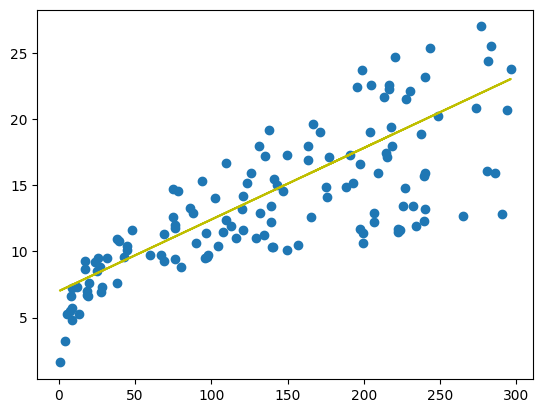

In [48]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()


In [49]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

163    3.224573
168   -0.125200
27    -2.491085
131   -6.875850
194    3.175957
         ...   
190    1.877595
62    -2.653323
199   -4.613470
49    -0.515734
20     0.633194
Name: Sales, Length: 134, dtype: float64

In [50]:
y_train_pred

array([14.77542733, 17.22520031, 18.39108457, 19.57584954, 14.1240426 ,
       11.57514586, 17.27240211, 18.26363973,  7.98308951, 20.5576468 ,
        7.31282407, 13.72754755,  7.94532808, 20.77949523, 17.71609895,
        8.40790564,  7.40250747,  9.87116118, 18.38164421, 11.64594854,
       13.27441035,  7.09097565, 10.66415128, 13.24608928, 10.66415128,
        7.86980521, 15.32296811,  7.61019536, 18.37692403,  8.26630026,
       16.95142992, 12.74575029,  7.45442944,  8.35598367, 13.39713501,
        7.42610837, 14.87455109, 13.62842379, 12.73158975, 10.84351808,
        8.86104284, 20.34051856, 11.2258526 , 16.48885237, 11.10312794,
       16.17732054, 20.4443625 , 16.48885237,  7.97364915, 17.91906665,
       20.1281105 , 11.9055584 , 13.56706146, 11.49018263, 16.73430168,
        8.24269937, 12.86847495, 13.63314397,  7.67627787, 15.35128919,
        9.33778093,  9.08761144, 19.97706477, 16.28116448, 16.69182007,
        8.32294241, 13.80307042, 17.33376444, 16.44637075, 12.12

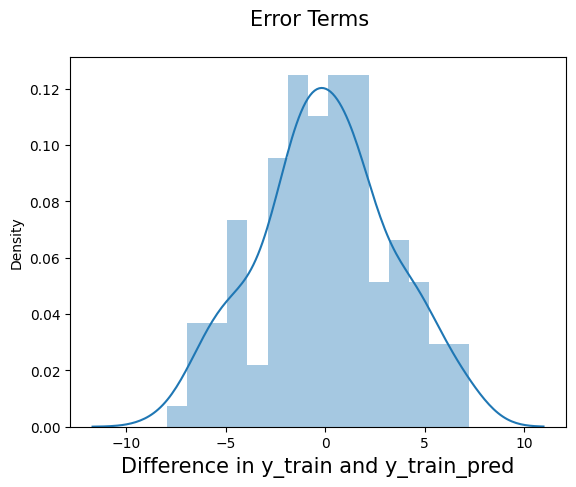

In [51]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

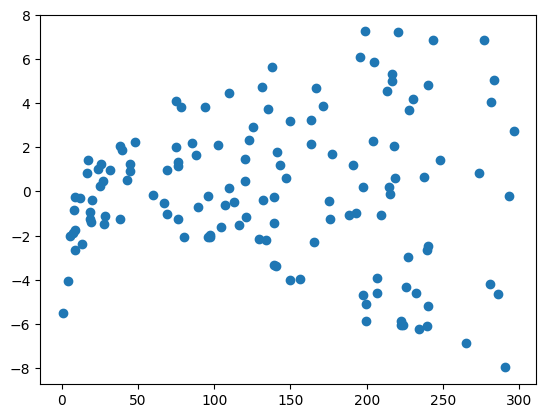

In [52]:
plt.scatter(X_train, res)
plt.show()

In [53]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
y_pred

array([10.61222931, 15.09167933, 15.92715104, 11.79699428, 10.28653694,
       11.32497636, 20.63316967, 20.88333917, 17.37152587, 17.13079673,
       19.45784506,  9.99860601, 19.65609258, 15.59201832,  9.77203741,
       16.45581111,  8.23797919, 17.4328882 , 15.00671611, 17.89074558,
       12.28317273, 10.25821587, 14.20900583, 10.17797282, 15.78554567,
       10.5225459 , 18.90086392, 14.82262912, 15.78554567, 11.50434317,
       19.59473026,  7.86980521,  9.09233161, 18.30140116, 20.11867014,
       20.73229343, 12.58998438, 10.39038089,  9.58323025,  8.79968051,
       15.67698155, 17.00807207, 10.62166966, 15.20024345, 16.20092144,
       19.03774911, 20.28387641, 18.46660743, 16.6162972 , 11.17393063,
       18.26363973, 19.11327198,  7.68099804, 17.46592945, 15.41265152,
       13.48681842, 15.92243087, 17.00335189, 17.83410343, 19.39176255,
       18.80174016, 20.47740376,  9.41802398,  7.90284647, 19.46728542,
        9.71067509])

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

3.1410143402307624

In [56]:
r2 = r2_score(y_test, y_pred)
r2

0.6289715470701918

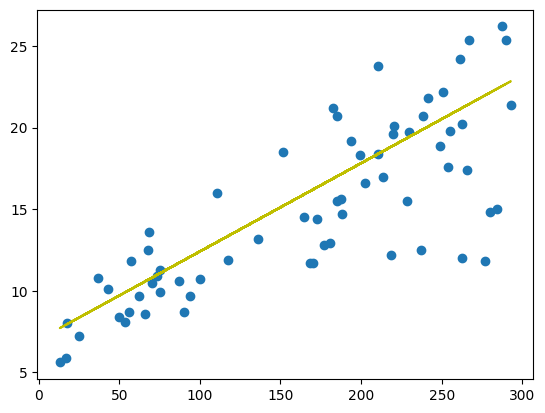

In [57]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()